## Take-Home Exam 2 : Statistics & Hypothesis Testing

*In this take-home exam, you are going to study hypothesis testing and related statistics concepts in more detail.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th2`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

### Question 1: t-Distributions & t-Test

> The **t-distribution** (aka, Student’s t-distribution) is a probability distribution that is used to estimate population parameters when the sample size is small and/or when the population variance is unknown.

> **Degrees of Freedom**: There are actually many different t-distributions. The particular form of the t-distribution is determined by its degrees of freedom. The degrees of freedom refers to the number of independent observations in a set of data. When estimating a mean score or a proportion from a single sample, the number of independent observations is equal to the sample size minus one. Hence, the distribution of the t-statistic from samples of size 8 would be described by a t-distribution having 8 - 1 or 7 degrees of freedom.

For further information regarding t-distribution you can check the [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-distribution) and [StatTrek](https://stattrek.com/probability-distributions/t-distribution.aspx).

Now, below **you have a scenario where a t-distribution is needed to be utilized for hypothesis testing**.

---

**Question Scenario** : An iron company has a sample of 35 irons for which the monthly electric consumption is measured. The values can be observed in the list variable named `sample_values` below. In addition, engineers of the company initially had claims for **average monthly consumption of all irons to be 84 kWh**. However, the company finds the resulting consumption values **exceeding** the given claim. As a result, the company wants to know if the sampled 35 irons have a greater average monthly consumption than the estimated mean, 84 kWh.

---

In [ ]:
sample_values = [
  87, 83, 84, 86, 85, 89, 81, 89, 81, 89, 87, 82, 88, 85, 87, 84, 87, 83,
  81, 82, 80, 89, 87, 82, 84, 81, 86, 81, 87, 89, 83, 80, 89, 85, 80
]

#### Task 1: Null and Alternative Hypotheses

From the given question above, please fill the null and alternative hypotheses definitions below.

<font color="blue">[Double click to fill in the blanks]</font>

$ H_0: $ μ = 84 kWh, monthly consumption is equal to the 84kWh on average.

$ H_1: $ μ > 84 kWh, monthly consumption is higher than 84kWh on average. 

#### Task 2: Type of the Hypothesis Testing
Are we conducting a left-tailed or a right-tailed hypothesis testing? Why?

<font color="blue">[Double click to type your answer]</font>


We are conducting a right-tailed hypothesis testing because we are looking for greater than average monthly comsumption of irons which is 84kWh and this is the right hand side of the curve.

#### Task 3: t-Statistic

Since the sample we have is small and lacking inforformation regarding the actual population, we are going to utilize the t-distribution to model our data. In order to locate the sample mean, we'll deploy t-scores. You may think of it as a z-score, but defined for a t-distribution.

The formula for calculating the t-score is given below;

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fefcbd88b2358228836cc4dc9e1a84f99765715d)

where 
  - $\bar{X}$ is sample mean,
  - $ \mu$ is the mean to be tested,
  - $S$ is the sample standard deviation,
  - $n$ is the sample size,
  - also the degree of freedom is $n-1$

Now, calculate the t value (t-test statistic) for the question.

*hint: You also need to calculate some of the metrics above.*

In [ ]:
# your code
sampleMean = np.mean(sample_values)
M = 84
Std = np.std(sample_values)
n = 35
df = n-1
tTest = (sampleMean- 84)/(Std / np.sqrt(n))
tTest

1.2780031950464965

#### Task 4: t-Distribution

In the rats' mean response time experiment, our alternative hypothesis stated that the sample's mean response time is less than the mean response time of the population. To this end, we obtained the corresponding z-score of the sample mean, our test statistic, and showed it on the population distribution. Then, calculated the required probability accordingly. 

In the figure below, we have a standard normal distribution and a z-score of -1.96. The blue shaded area represents a left-tailed test.

![](https://mat117.wisconsin.edu/wp-content/uploads/2014/12/section3-21.png)

Now using the t-distribution option from `scipy.stats`, plot a 0-centric t-distribution with the correct degrees of freedom and shade the area of interest in the question scenario for the appropriate test type.

*p.s. You may check the documentation for numpy implemantation of t-distribution from this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t)*

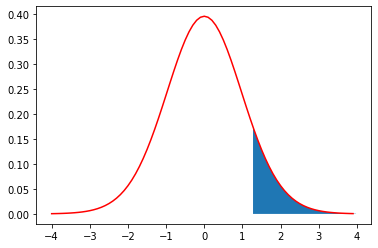

In [ ]:

from scipy import stats
x = np.arange(-4,4,0.1)
tValues = stats.t.pdf(x,df)
fillx = np.arange(tTest,4,0.1)
fillValues = stats.t.pdf(fillx,df)
plt.plot(x,tValues,'r')
plt.fill_between(fillx,fillValues,0)

#### Task 5: p-value and Test Result

By using the appropriate method of testing from `scipy.stats` conduct the hypothesis test needed for the question given. Then, by checking the resulting p-value, evaluate the scenario (accept or reject the null hypothesis? why?) with significance level ($\alpha$) set to 0.05. 

*p.s. By default, scipy's hypothesis testing functions perform two-tailed tests. In other words, the resulting p-values are calculated for the  two-tailed scenario. You should find a way to convert them to one-tail.*

In [ ]:
from scipy import stats
Tstat, pvalue = stats.ttest_1samp(sample_values,84)
if pvalue/2 < 0.05:
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")
pvalue/2

we are accepting null hypothesis


0.1081935602697514

<font color="blue">[Double click to type your decision and its explanation]</font>



Since the significance level is higher than 0.05 which is 0.108... , we are accepting null hypothesis

### Question 2: Two-tailed t-Test

For the second question, you will utilize the *TMDB 5000 Movie Dataset* from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv). For the dataset, the csv file called `tmdb_5000_movies.csv` has already been shared with you.

Our objective is to check if there is any statistically significant difference between the IMBD ratings (named as `"vote_average"` in the dataset) of USA and non-USA made movies. Below, you may find the hypothesis setting.

$\mu_{us}$: avg. IMDB rating of US made movies  
$\mu_{non-us}$: avg. IMDB rating of non-US made movies

$H_0: \mu_{us} = \mu_{non-us}$  
$H_A: \mu_{us} \neq \mu_{non-us}$

#### Task 1: Preprocessing

As you can also check, some of the columns in the dataset need preprocessing. In this task, you need to write a function to be applied to the dataframe using the information in the column named `production_countries`. The function should be used for discriminating movies produced in the United States and movies produced in other countries. If a movie has multiple countries for production where United States is one of them, you should consider it as United States made as well. Apply your function to create a new column, named `"made_where"`. Lastly, show the top 3 rows of the resulting dataframe. 

In [ ]:
df = pd.read_csv(join(path_prefix, "tmdb_5000_movies.csv"))
dfCopy = df.copy()
def ProductionCountry(Where):
  if 'United States' in Where:
    return 'US'
  else:
    return 'Other'

dfCopy['made_where'] = dfCopy['production_countries'].apply(ProductionCountry)

In [ ]:
dfCopy.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,made_where
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,US
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,US
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,US


#### Task 2: Visualizing the Rating Distributions

Before applying the hypothesis testing, plot the distributions of ratings of movies from US and movies from other countries **in the same figure**. To this end, you may plot both ratings as histograms or seaborn kdeplots as we did in the hypothesis testing recitation.

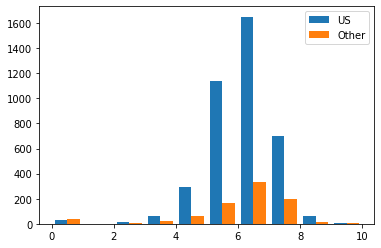

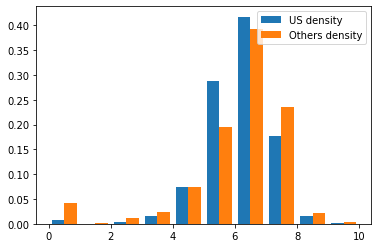

In [ ]:
ratingUS = dfCopy[dfCopy['made_where'].str.contains('US')]['vote_average']
ratingOther = dfCopy[dfCopy['made_where'].str.contains('Other')]['vote_average']
plt.hist([ratingUS, ratingOther], 10, label=['US', 'Other'])
plt.legend(loc='upper right')
plt.show()
plt.hist([ratingUS, ratingOther], 10, label=['US density', 'Others density'], density = True)
plt.legend(loc='upper right')
plt.show()

#### Task 3: Comparing Ratings from US and Other Countries

In this section, you need to test whether there is significant difference in the rating distributions of the movies produced in the US and films produced in other countries.

Now, by utilizing the new column you created, test whether ratings of movies from US and from other countries differ significantly. Again, you can utilize the `stats.ttest_ind`.

Then, evaluate the results of the hypothesis testing you conducted with significance level ($\alpha$) set to 0.05. 

In [ ]:
t, p = stats.ttest_ind(ratingUS, ratingOther, equal_var=False)
print(t)
print(p)
if p/2 < 0.05:
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

2.0270548056859883
0.04292181627082308
we are rejecting null hypothesis


<font color="blue">[Double click to type your decision and its explanation.]</font>

### Question 3: Chi-Square Test of Independence

> **Chi-Square Test** can be used to test the independence of two categorical variables. However, to determine the critical value, we need to determine the degrees of freedom. In Chi-square tests, the degree of freedom value is determined by $(r-1)(c-1)$ where $r$ is the number of rows and $c$ is the number of the columns in the contingency table (crosstab). From the image below, you can find corresponding threshold values for varying degrees of freedom and threshold critical probability $\alpha$.

<img src="https://www.mun.ca/biology/scarr/IntroPopGen-Table-D-01-smc.jpg" width="400" height="400" />



For this question, you will use the `adults.csv` that is shared with you, which is a modified version of [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult/). You will check for the statistical dependence between features `education` and `marital-status`.

In the following test, our hypotheses setting is the following:

$H_0$: `Education` and `Marital Status` are independent variables.

$H_A$: `Education` and `Marital Status` are **not** independent variables.

In [ ]:
adults_df = pd.read_csv(join(path_prefix, "adults.csv"), index_col=False)
adults_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,High-school,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,High-school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Task 1: Creating the Contingency Table

> A contingency table is a special type of frequency distribution table that displays the frequency counts of two categorical variables.

By using `pd.crosstable`, create an appropriate table format to apply Chi-Square test on features `education` and `marital-status`.

*hint: You may check the related recitation material.*

In [ ]:

crosstable_df = pd.crosstab(adults_df['education'],adults_df["marital-status"],margins = True)
crosstable_df_C= pd.crosstab(adults_df['education'],adults_df["marital-status"],margins = False)
crosstable_df 

marital-status,Divorced,Married,Never-married,All
education,,,,
Bachelors,720,2840,1795,5355
Doctorate,47,293,73,413
High-school,3288,6751,4664,14703
Masters,299,1020,404,1723
Preschool,5,24,22,51
Some-college,2102,4489,3725,10316
All,6461,15417,10683,32561


#### Task 2: Visualizing the Crosstable

Create a *stacked bar chart* for the **row-wise normalized** crosstable, where the bars are grouped by education levels, so that any dependency should be visualy noticable. 

An exemplary figure can be found below.

<img width="700" height="300" src="https://i.ibb.co/cTx8VQ4/pm.png" />

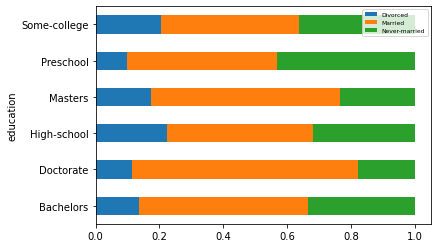

In [ ]:
# your code
crosstable_df_withoutALL = crosstable_df.drop(columns="All",index = 'All')
crosstable_df_withoutALL['Divorced'] = list(map(lambda x,y: x/y, crosstable_df_withoutALL['Divorced'],crosstable_df['All']))
crosstable_df_withoutALL['Married'] = list(map(lambda x,y: x/y, crosstable_df_withoutALL['Married'],crosstable_df['All']))
crosstable_df_withoutALL['Never-married'] = list(map(lambda x,y: x/y, crosstable_df_withoutALL['Never-married'],crosstable_df['All']))


crosstable_df_withoutALL.plot(kind= 'barh',stacked = True)
plt.legend(prop={"size":6})
plt.show()

#### Task 3: Computing The Chi-Square Test Statistic

For this task, you are going to implement the Chi-Square Test from scratch. In the previous task, you created a contingency table that summarizes the relationship between two categorical variable by storing the frequencies, called **observations**, in each corresponding cell.  However, in order to observe the significance of these observations, we need to obtain **expected frequencies** which specify what the values of each cell of the contingency table would be if there was no association between the two variables. Once you obtain the expected frequencies, you can calculate the test statistic quite easily.

Below you can find the detailed instructions to perform the test.

1. Compute the contingency table.

2. Calculate expected frequencies
  - For a particular cell located at $i^{th}$ row and $j^{th}$ column, the expected frequency is $\large{\frac{(f_i*f_j)}{total}}$, where $f_i$ is the total frequency in row i and $f_j$ is the total frequency in column j. In parallel, $total$ is the overall frequency.

  - For instance, in the contingency table below, red numbers represent row and column totals, whereas the blue value represents the total frequency. The expected frequency of cell [over 30, analog], highlighted as green, can be calculated as $\large{\frac{(60*80)}{200}}$.

| |  | Watching | Preference | |
|:-:|:-:|:-:|:-:|:-:|
| Age	|	digital | 	analog |	undecided |
| under 30 | 	90 | 	40 |	10 |	<font color="red">140</font>
| over 30 |	10 |	**<font color="green">40<font>** |	10 |	<font color="red">60</font>
|	| <font color="red">100</font> | 	<font color="red">80</font> |	<font color="red">20</font> | 	<font color="blue">200</font>

3. Compute the Chi-squared statistic.

  - $\chi^2 = \sum \Large{\frac{(f_o-f_e)^2}{f_e}}$, where $f_o$ and $f_e$ are the observed and expected frequencies, respectively.

  - For each cell in the contingency table, you are going to compute the residual, $f_o-f_e$, take its square and divide it to $f_e$. And finally sum all the results, so that you will obtain the chi2 test statistic, $\chi^2$.

4. Find the Degrees of Freedom

  - $(r-1)(c-1)$, where $r$ is the number of rows and $c$ is the number of the contingency table.

5. Obtain the p-value.

  - Use scipy's `chdtrc` function to calculate the p-value. The sample usage can be found below.

  ```py
  >>> from scipy.special import chdtrc
    # dof -> degrees of freedom
    # chi2_stat -> obtained chi2 statistic
  >> chdtrc(dof, chi2_stat)
  ```

You can always test your results with the `scipy.stats.chi2_contingency` as we did in recitation 6.

You may also check the link below to observe an exemplary setup.

https://stattrek.com/chi-square-test/independence.aspx

Once you perform the steps above, print the obtained $\chi^2$ and corresponding p-value.

In [ ]:
# your code
import scipy
from scipy.stats import chi2_contingency
from scipy.special import chdtrc
len(crosstable_df.index)
xsquare = 0
dof = (len(crosstable_df_C.index)-1)*(len(crosstable_df_C.columns)-1)
E00 = crosstable_df.iloc[6][0]*crosstable_df.iloc[0][3]/crosstable_df.iloc[6][3]
E01 = crosstable_df.iloc[6][1]*crosstable_df.iloc[0][3]/crosstable_df.iloc[6][3]
E02= crosstable_df.iloc[6][2]*crosstable_df.iloc[0][3]/crosstable_df.iloc[6][3]
E10 =crosstable_df.iloc[6][0]*crosstable_df.iloc[1][3]/crosstable_df.iloc[6][3]
E11 = crosstable_df.iloc[6][1]*crosstable_df.iloc[1][3]/crosstable_df.iloc[6][3]
E12= crosstable_df.iloc[6][2]*crosstable_df.iloc[1][3]/crosstable_df.iloc[6][3]
E20 =crosstable_df.iloc[6][0]*crosstable_df.iloc[2][3]/crosstable_df.iloc[6][3]
E21 = crosstable_df.iloc[6][1]*crosstable_df.iloc[2][3]/crosstable_df.iloc[6][3]
E22= crosstable_df.iloc[6][2]*crosstable_df.iloc[2][3]/crosstable_df.iloc[6][3]
E30 = crosstable_df.iloc[6][0]*crosstable_df.iloc[3][3]/crosstable_df.iloc[6][3]
E31 = crosstable_df.iloc[6][1]*crosstable_df.iloc[3][3]/crosstable_df.iloc[6][3]
E32= crosstable_df.iloc[6][2]*crosstable_df.iloc[3][3]/crosstable_df.iloc[6][3]
E40 =crosstable_df.iloc[6][0]*crosstable_df.iloc[4][3]/crosstable_df.iloc[6][3]
E41 = crosstable_df.iloc[6][1]*crosstable_df.iloc[4][3]/crosstable_df.iloc[6][3]
E42= crosstable_df.iloc[6][2]*crosstable_df.iloc[4][3]/crosstable_df.iloc[6][3]
E50 =crosstable_df.iloc[6][0]*crosstable_df.iloc[5][3]/crosstable_df.iloc[6][3]
E51 = crosstable_df.iloc[6][1]*crosstable_df.iloc[5][3]/crosstable_df.iloc[6][3]
E52= crosstable_df.iloc[6][2]*crosstable_df.iloc[5][3]/crosstable_df.iloc[6][3]
def chisquare(exact,expected):
  return (exact-expected)*(exact-expected)/expected
xsquare = chisquare(crosstable_df.iloc[0][0],E00)+chisquare(crosstable_df.iloc[0][1],E01)+chisquare(crosstable_df.iloc[0][2],E02)+chisquare(crosstable_df.iloc[1][0],E10)+chisquare(crosstable_df.iloc[1][1],E11)+chisquare(crosstable_df.iloc[1][2],E12)+chisquare(crosstable_df.iloc[2][0],E20)+chisquare(crosstable_df.iloc[2][1],E21)+chisquare(crosstable_df.iloc[2][2],E22)+chisquare(crosstable_df.iloc[3][0],E30)+chisquare(crosstable_df.iloc[3][1],E31)+chisquare(crosstable_df.iloc[3][2],E32)+chisquare(crosstable_df.iloc[4][0],E40)+chisquare(crosstable_df.iloc[4][1],E41)+chisquare(crosstable_df.iloc[4][2],E42)+chisquare(crosstable_df.iloc[5][0],E50)+chisquare(crosstable_df.iloc[5][1],E51)+chisquare(crosstable_df.iloc[5][2],E52)
print("x^2 = " ,xsquare)
print("p-value = ",chdtrc(dof,xsquare))

x^2 =  473.3673276295488
p-value =  2.154881153496343e-95


#### Task 4: Conclusion

Compare the obtained p-value and $\alpha$ (0.05), then evaluate your hypotheses.

<font color="blue">[Double click to type your decision and its explanation.]</font>


 Since p value is lower than significance level which is 0.05, we are rejecting null hypothesis


